# <font color='blue'>G</font><font color='red'>o</font><font color='F2EA0D'>o</font><font color='blue'>g</font><font color='green'>l</font><font color='red'>e</font> Play Store Applications Analysis

----------------------------------------------------------------------------------------------------------------
## Contents
1. <font color='DE1212'> Research Questions & Motivation </font>
2. <font color='DE1212'> The Data </font>
3. <font color='DE1212'> The Exploration </font>
4. <font color='DE1212'> The Model - (Decision Tree Classifier) </font>
5. <font color='DE1212'> Conclusion </font>

### Research Questions: 
* <font color='DE1212'> Can you predict an app's popularity on the Google Play Store using a Decision Tree? </font>
* <font color='DE1212'> If a developer were to create a new app, what qualities should this app have in order to generate the most ad revenue? </font>

    
### Motivation: 
* <font color='DE1212'> Gain edge over the industry competition for app success. </font>
* <font color='DE1212'> Provide insight for advertisement companies on which apps would generate the most revenue if ads were added. </font>
* <font color='DE1212'> Assist Android developers to develop state-of-the-art apps that the public deserve. </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
init_notebook_mode(connected=True)

## The Data

<font color="navy">Load the datasets into pandas dataframes</font>

In [2]:
df_reviews = pd.read_csv("./GooglePlayStoreApps/googleplaystore_user_reviews.csv")
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
df_apps = pd.read_csv("./GooglePlayStoreApps/googleplaystore.csv")
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<font color="navy">We will only be using the df_apps dataframe.</font>

<font color="navy">Next, find the number of unique app categories.</font>

In [4]:
categories = list(df_apps["Category"].unique())
print("There are {0:.0f} categories! (Excluding/Removing Category 1.9)".format(len(categories)-1))
print(categories)
#Remove Category 1.9
categories.remove('1.9')

There are 33 categories! (Excluding/Removing Category 1.9)
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']


<font color='navy'>Drop rows with Category "1.9" from dataframe. As seen below, this incorrectly labeled app category only affected one app. We can remove this row from the dataframe.

In [5]:
a = df_apps.loc[df_apps["Category"] == "1.9"]
print(a.head())
print("This mislabeled app category affects {} app at index {}.".format(len(a),int(a.index.values)))
df_apps = df_apps.drop(int(a.index.values),axis=0)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  
This mislabeled app category affects 1 app at index 10472.


In [6]:
df_apps['Rating'].isnull().sum()

1474

<font color="navy">Delete rows that don't have any ratings.</font>

In [7]:
df_apps = df_apps.drop(df_apps[df_apps['Rating'].isnull()].index, axis=0)

## The Exploration

In [8]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null object
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9362 non-null object
Android Ver       9364 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


<font color='navy'> As seen above, there are not any null values.</font>

In [9]:
df_apps["Rating"].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [10]:
layout = go.Layout(
    xaxis=dict(title='Ratings'),yaxis=dict(title='Number of Apps'))
data = [go.Histogram(x=df_apps["Rating"])]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic histogram')


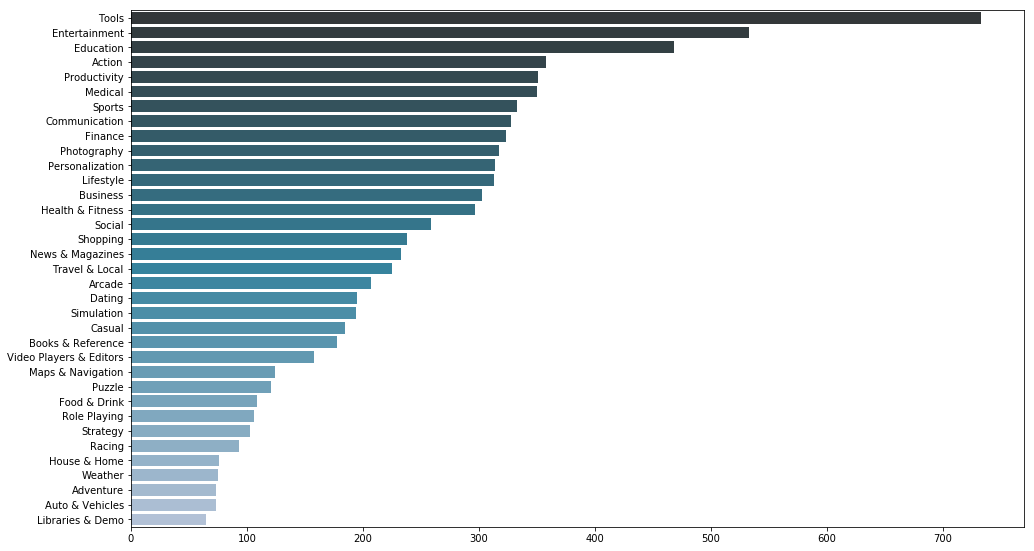

In [11]:
#Show top 35 app genres
plt.figure(figsize=(16, 9.5))
genres = df_apps["Genres"].value_counts()[:35]
ax = sns.barplot(x=genres.values, y=genres.index, palette="PuBuGn_d")

### <font color="navy">Which categories have the best overall rating? Also, which category had the most installs? Let's find out!</font>

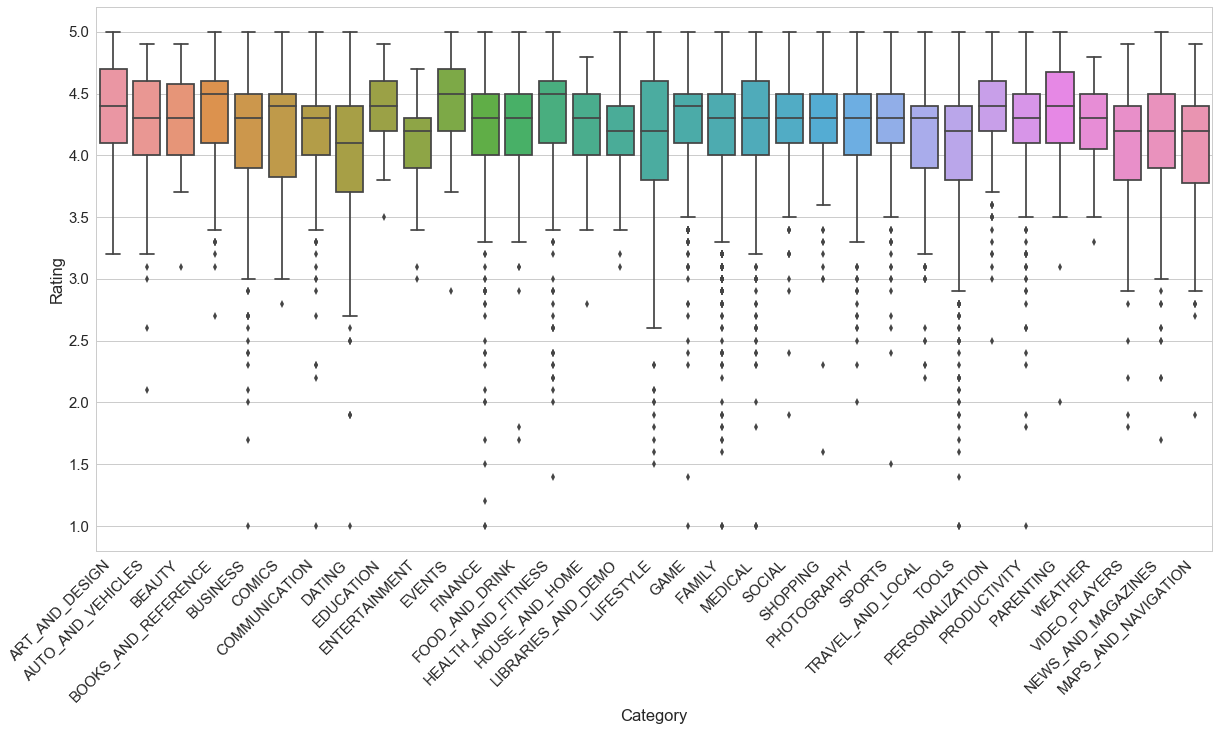

In [12]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df_apps)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')


<font color='navy'>All of the categories have close rating averages. In order to further define which categories are the highest rated, we will only look at the data for each category that has more than or equal to 4.0 in rating.</font>

In [13]:
#Cut away rows which have < 4.0 ratings
highRating = df_apps.copy()
highRating = highRating.loc[highRating["Rating"] >= 4.0]
highRateNum = highRating.groupby('Category')['Rating'].nunique()
highRateNum

Category
ART_AND_DESIGN         10
AUTO_AND_VEHICLES       8
BEAUTY                 10
BOOKS_AND_REFERENCE    11
BUSINESS               11
COMICS                 10
COMMUNICATION          10
DATING                 11
EDUCATION              10
ENTERTAINMENT           8
EVENTS                 11
FAMILY                 11
FINANCE                11
FOOD_AND_DRINK         10
GAME                   11
HEALTH_AND_FITNESS     11
HOUSE_AND_HOME          9
LIBRARIES_AND_DEMO      9
LIFESTYLE              11
MAPS_AND_NAVIGATION    10
MEDICAL                11
NEWS_AND_MAGAZINES     11
PARENTING              11
PERSONALIZATION        11
PHOTOGRAPHY            11
PRODUCTIVITY           11
SHOPPING               10
SOCIAL                 11
SPORTS                 11
TOOLS                  11
TRAVEL_AND_LOCAL       10
VIDEO_PLAYERS          10
WEATHER                 9
Name: Rating, dtype: int64

<font color='navy'> There are many categories of apps that are equal in terms of being the highest rated. This is great, however, the interest should lie within the app categories which have the lowest number of high ratings. These poorly rated apps deserve more attention because if a new sleek new app in that category were to be put on the app store, then the developers could satisfy the demand for innovation in this area. In this case,</font><font color='black'> **The Categories of Importance are "AUTO_AND_VEHICLES"and "ENTERTAINMENT."**

### <font color="navy">Now to analyze the apps which would produce the most ad revenue
One parameter that would affect ad revenue the most is the number of installs an app has. More installs means more people are opening the app and viewing the embedded ads, hence, there is more money being made. A free application may lead to more installs, however, other parameters may alter how many installs an app will have. **Let's see if there is a correlation between installs and other parameters!**

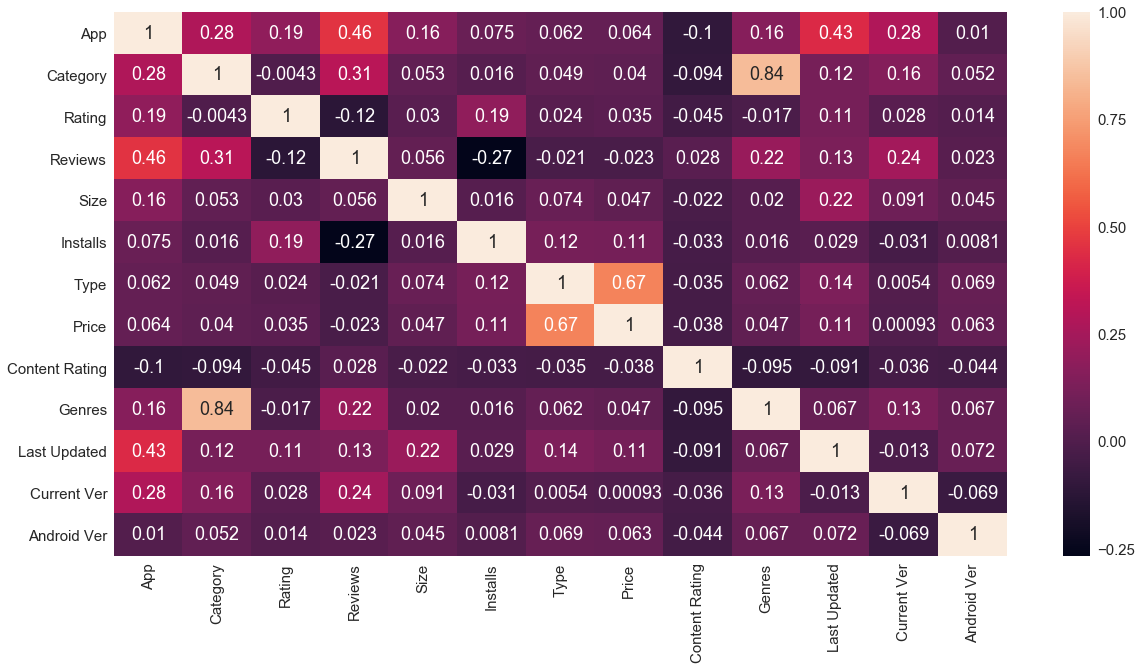

In [14]:
df_apps.dtypes
df_apps["Type"] = (df_apps["Type"] == "Paid").astype(int)
corr = df_apps.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

Above, we can see that Installs and Reviews has the strongest inverse correlation. This is reasonable because more reviews are conducted on apps that are the most popular. Since Installs was not correlated to Type, this disproves our intuition that free apps lead to more installs. Since the Installs parameter is independent and not correlated to any other parameters, we must only use Installs to show the popularity of an app. Apps with larger amounts of installs would generate the most revenue.
Let's take a look at the **Top 40 Apps that businesses should consider signing advertising deals with! **

In [15]:
#Extract App, Installs, & Content Rating from df_apps
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App','Installs','Content Rating']]

,App,Installs,Content Rating
0,Messenger – Text and Video Chat for Free,1000000000,Everyone
1,Google Drive,1000000000,Everyone
2,Instagram,1000000000,Teen
3,Google,1000000000,Everyone
4,Instagram,1000000000,Teen
5,Google+,1000000000,Teen
6,Subway Surfers,1000000000,Everyone 10+
7,Maps - Navigate & Explore,1000000000,Everyone
8,Google,1000000000,Everyone
9,Hangouts,1000000000,Everyone


## The Model - (Decision Tree Classifier)

<font color="navy">In order to predict if an app will be successful, we must first determine what shows success. In this case a popular app has a high install value. The way in which we will go about preprocessing the data is by binarizing the Installs column. Anything above 100,000 will be considered equal to 1, and everything below that threshold will be equal to 0. This data split is not symmetric and will cause the model to be biased when predicting popularity of an app. We will pop off the enough values of each group to make a 50-50 training set, and the rest will be used for our test set. Also, we will encode the object labels of desired features.</font>

In [16]:
popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres']) 
popAppsCopy.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres              int64
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<font color="navy"> Since the important data is already preprocessed into floats and integers, we can drop the object features and build an 80/20 training/test split.</font>

In [17]:
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized
print("Cut {} apps off Popular df for a total of 3558 Popular training apps.".format(int(4568*.22132)))
print("Cut {} apps off Unpopular df for a total of 3558 Unpopular training apps.\n".format(int(4324*.17738)))

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)
print("Values were not dropped from training dataframe.",testPop1.index[0] in popAppsCopy.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)
print("Values were not dropped from training dataframe.",testPop0.index[0] in popAppsCopy.index)

testDf = testPop1.append(testPop0)
trainDf = popAppsCopy

#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()

X_train = X_train.drop(['Reviews', 'Rating'], axis=1) #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate
X_test = X_test.drop(['Reviews', 'Rating'], axis=1)   #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate

There are 8892 total rows.
4568 Apps are Popular!
4324 Apps are Unpopular!

For an 80-20 training/test split, we need about 1778.4 apps for testing

Cut 1010 apps off Popular df for a total of 3558 Popular training apps.
Cut 766 apps off Unpopular df for a total of 3558 Unpopular training apps.

Values were not dropped from training dataframe. False
Values were not dropped from training dataframe. False


In [18]:
print("{} Apps are used for Training.".format(y_train.count()))
print("{} Apps are used for Testing.".format(y_test.count()))
X_test.head(3)

7116 Apps are used for Training.
1776 Apps are used for Testing.


,Category,Size,Type,Price,Content Rating,Genres
0,11,60000000.0,0,0.0,1,101
1,14,31000000.0,0,0.0,4,0
2,11,48000000.0,0,0.0,1,94


### <font color="navy"> Fit on Train Set </font>

In [19]:
popularity_classifier = DecisionTreeClassifier(max_leaf_nodes=29, random_state=0)
popularity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=29,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### <font color="navy"> Predict on Test Set </font>

In [20]:
predictions = popularity_classifier.predict(X_test)
print("Predicted: ",predictions[:30])
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1]


### <font color="navy"> Measure Accuracy of Classifier </font>

In [21]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.722972972972973

### Find out what caused higher popularity

<font color="navy">If different apps with the same app sizes are compared, we can see that the Category and the Genres columns are the only parameters that differ when determining popularity. Shown below, the 1 in the "Popular?" column may be an outlier, so as a whole, given all columns below, we can predict with ~72% accuracy the success of an app.

In [22]:
X_testCopy = X_test.copy()
X_testCopy["Popular?"] = y_test
X_testCopy[X_test["Size"] == 3600000].head(10)

,Category,Size,Type,Price,Content Rating,Genres,Popular?
112,11,3600000.0,0,0.00,1,50,0
616,12,3600000.0,0,0.00,1,58,0
1297,19,3600000.0,0,0.00,1,68,1
1310,31,3600000.0,0,0.00,4,110,0
1352,23,3600000.0,1,0.99,1,78,0


<font color="navy"> When running the kernel, the Accuracy of this Decision Tree Classifier will be about 95% (IF INCLUDING REVIEWS & RATINGS). When not including the rating and reviews features, the Classifier has around 72% Accuracy. This shows that **given the Size, Type, Price, Content Rating, and Genre of an app, we can predict within 72% certainty if an app will have more than 100,000 installs and be a hit on the Google Play Store.** </font>

## Conclusion

* **<font color="DE1212"> For Innovation </font>** - **Developers** should focus in on apps with a category  of **Auto and Vehicles** and **Entertainment**, as there are not many highly rated apps in these categories.
***
* **<font color="DE1212"> For Revenue </font>** - **Marketers** should advertise on the top 40 most installed apps list above, in order to reach the maximum viewing of their advertisements.
***
* **<font color="DE1212"> For Popularity </font>** - **Everyone** building apps should consider that the Category and Genre of an app may strongly dictate if an app will be popular or not. However, the Size, Type, Price, Content Rating, and Genre features should all be used to most accurately determine if an app will gain maximum installs. 

## Model Limitations
* Better performance for predicting app success would come by using alternative ML models. Random Forests, Logistic Regression, and K Nearest-Neighbors would be great models to test against Decision Trees. More than likely, we could achieve up to 80% accuracy using one of these models rather than the current ML model. 